### Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os

### read csv data file

In [5]:
os.chdir("C:\\Users\\idanh\\Documents\\תעונ שנה ד\\פרויקט גמר\\New test")
df = pd.read_csv('df_to_kfold.csv').drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,tag,URL_bio,Person_bio,Polarity_bio,PolarityPos_bio,PolarityNeg_bio,Subjectivity_bio,Hashtags_bio,Mention_bio,Length_bio,...,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2
0,True,0,0,-0.312500,0,1,1.000000,0,0,99,...,0.132567,0.350545,0.139759,0.411362,0.374171,0.314756,0.270929,0.317115,0.243213,0.445645
1,False,0,0,0.000000,0,0,0.000000,0,0,3,...,0.159466,0.828556,0.000000,0.000000,0.000000,0.355294,0.286614,0.282285,0.000000,0.000000
2,False,0,1,-0.095833,0,1,0.333333,2,0,136,...,0.000000,0.872780,0.000000,0.000000,0.000000,0.488115,0.000000,0.000000,0.000000,0.000000
3,False,1,0,0.000000,0,0,0.000000,0,0,155,...,0.334308,0.000000,0.000000,0.490826,0.295127,0.392490,0.000000,0.413474,0.362246,0.322485
4,False,0,0,0.000000,0,0,0.000000,0,0,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df.info() #get info to check whether dataframe have non values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tag                     966 non-null    bool   
 1   URL_bio                 966 non-null    int64  
 2   Person_bio              966 non-null    int64  
 3   Polarity_bio            966 non-null    float64
 4   PolarityPos_bio         966 non-null    int64  
 5   PolarityNeg_bio         966 non-null    int64  
 6   Subjectivity_bio        966 non-null    float64
 7   Hashtags_bio            966 non-null    int64  
 8   Mention_bio             966 non-null    int64  
 9   Length_bio              966 non-null    int64  
 10  Words_bio               966 non-null    int64  
 11  followers_count         966 non-null    int64  
 12  following_count         966 non-null    int64  
 13  tweet_count             966 non-null    int64  
 14  listed_count            966 non-null    in

In [10]:
for col in df.columns:
    if len(df[col].unique())==1:
        print(col)


test


C:\Users\idanh\AppData\Local\Temp\ipykernel_7744\301232893.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


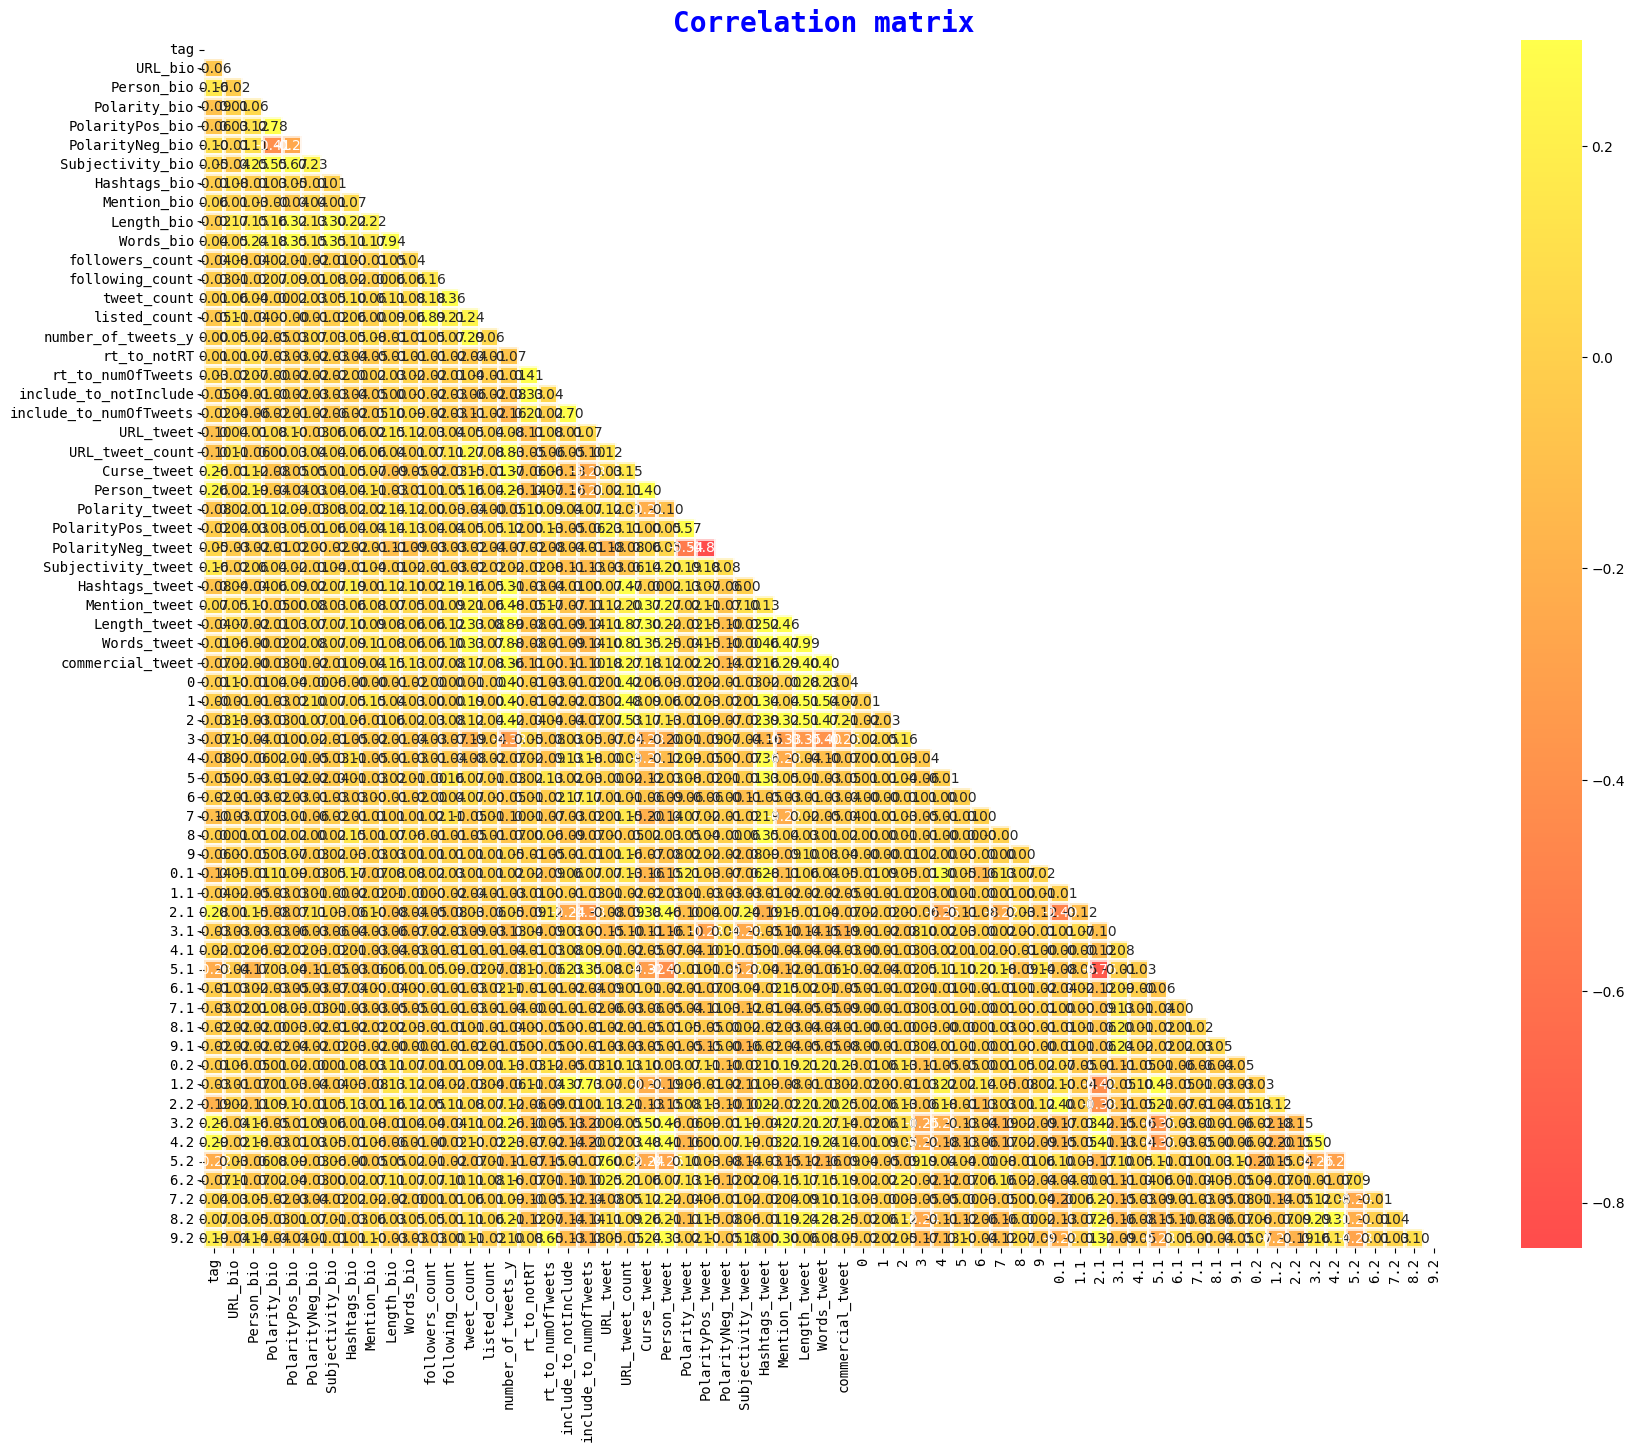

In [11]:
# Correlation matrix

df1 = df.copy()

cols = df1.columns

plt.figure(figsize = (20, 16), dpi = 100)

corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr,
            mask = mask,
            cmap = 'autumn',
            vmax=.3,
            annot = True,
            linewidths = 1.5,
            fmt = ".2f",
            alpha = 0.7)

hfont = {'fontname':'monospace'}
plt.xticks(**hfont)
plt.yticks(**hfont)

plt.title('Correlation matrix',
          family = 'monospace',
          fontsize = 20,
          weight = 'semibold',
          color = 'blue')

plt.show()

In [12]:
y = df['tag'] #get y as output model
X = df.drop(['tag'], axis=1) #get X as data to feed to model

C:\Users\idanh\AppData\Local\Temp\ipykernel_7744\2108765953.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax = ax)


array([[<AxesSubplot:title={'center':'URL_bio'}>,
        <AxesSubplot:title={'center':'Person_bio'}>,
        <AxesSubplot:title={'center':'Polarity_bio'}>,
        <AxesSubplot:title={'center':'PolarityPos_bio'}>,
        <AxesSubplot:title={'center':'PolarityNeg_bio'}>,
        <AxesSubplot:title={'center':'Subjectivity_bio'}>,
        <AxesSubplot:title={'center':'Hashtags_bio'}>,
        <AxesSubplot:title={'center':'Mention_bio'}>],
       [<AxesSubplot:title={'center':'Length_bio'}>,
        <AxesSubplot:title={'center':'Words_bio'}>,
        <AxesSubplot:title={'center':'followers_count'}>,
        <AxesSubplot:title={'center':'following_count'}>,
        <AxesSubplot:title={'center':'tweet_count'}>,
        <AxesSubplot:title={'center':'listed_count'}>,
        <AxesSubplot:title={'center':'number_of_tweets_y'}>,
        <AxesSubplot:title={'center':'rt_to_notRT'}>],
       [<AxesSubplot:title={'center':'rt_to_numOfTweets'}>,
        <AxesSubplot:title={'center':'include_to_no

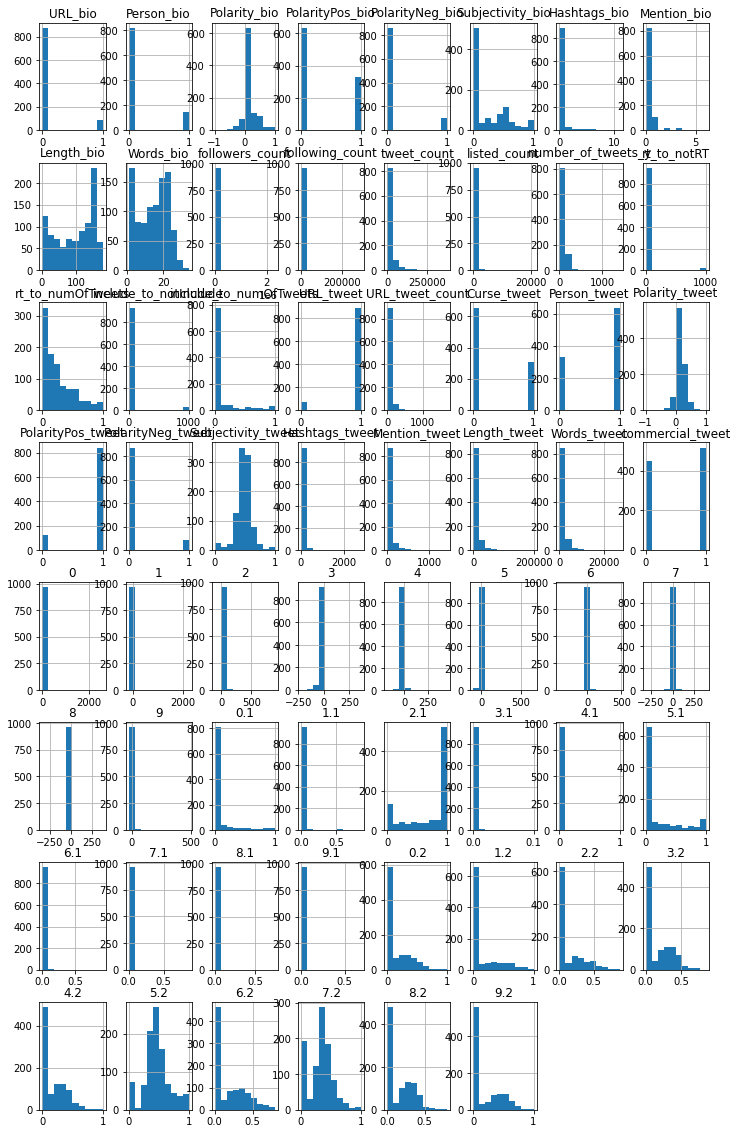

In [13]:
#Plot histogram to represent of the distribution of data
fig = plt.figure(figsize = (12,20))
ax = fig.gca()
X.hist(ax = ax)

False    818
True     148
Name: tag, dtype: int64


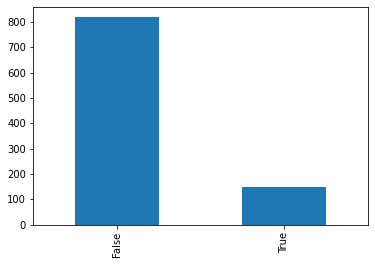

In [15]:
df['tag'].value_counts().plot(kind='bar', ) #plot bar chart to check imbalance data
print(df['tag'].value_counts())

<AxesSubplot:ylabel='tag'>

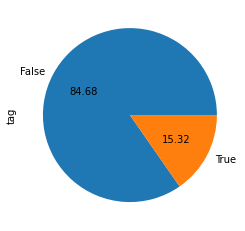

In [16]:
y.value_counts().plot.pie(autopct='%.2f') #plot pie chart

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

### Split data to train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

### Aplly standard scaler to scale value from -1 to 1

In [19]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Create model

In [21]:
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

fr = RandomForestClassifier(max_depth=9, n_estimators=1000)
fr.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [22]:
print("Accuracy score of decisiontree model is: ", decisiontree_classifier.score(X_test, y_test))
print("Accuracy score of logistic model is: ", logistic.score(X_test, y_test))
print("Accuracy score of random forest model is: ", fr.score(X_test, y_test))

Accuracy score of decisiontree model is:  0.7655172413793103
Accuracy score of logistic model is:  0.8413793103448276
Accuracy score of random forest model is:  0.8551724137931035


### Confusion matrix

Confusion matrix to metric model

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

These numbers are then organized into a table, or a matrix as follows: Expected down the side: Each row of the matrix corresponds to a predicted class. Predicted across the top: Each column of the matrix corresponds to an actual class.

true positives (TP): These are cases in which we predicted True, and they are True.<br>
true negatives (TN): We predicted False, and they are False.<br>
false positives (FP): We predicted True, but they are False.<br>
false negatives (FN): We predicted False, but they actually are True.

In [23]:
decisiontree_classifier_pred = decisiontree_classifier.predict(X_test)
cm_tree = confusion_matrix(y_test, decisiontree_classifier_pred)

logistic_pred = logistic.predict(X_test)
cm_logistic = confusion_matrix(y_test, logistic_pred)

fr_pred = fr.predict(X_test)
cm_fr = confusion_matrix(y_test, fr_pred)

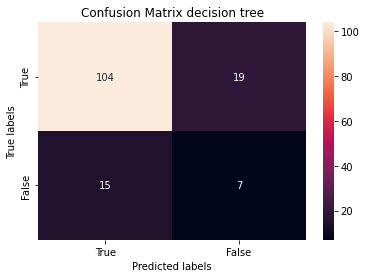

In [24]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

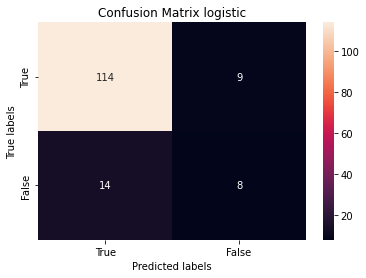

In [25]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

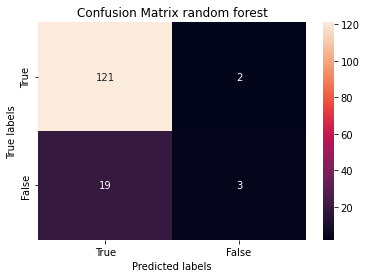

In [26]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

### Classification report to calculate some result

Accuracy: (TP+TN)/total

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate.
Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)<br>
support mean total prediction

In [27]:
target_names =['True','False']
print("Report model decision tree\n")
print(classification_report(decisiontree_classifier_pred, y_test, target_names=target_names))

Report model decision tree

              precision    recall  f1-score   support

        True       0.85      0.87      0.86       119
       False       0.32      0.27      0.29        26

    accuracy                           0.77       145
   macro avg       0.58      0.57      0.58       145
weighted avg       0.75      0.77      0.76       145



In [29]:
target_names = ['True','False']
print("Report model logistic\n")
print(classification_report(logistic_pred, y_test, target_names=target_names))

Report model logistic

              precision    recall  f1-score   support

        True       0.93      0.89      0.91       128
       False       0.36      0.47      0.41        17

    accuracy                           0.84       145
   macro avg       0.65      0.68      0.66       145
weighted avg       0.86      0.84      0.85       145



In [30]:
target_names = ['True','False']
print("Report model random forest\n")
print(classification_report(fr_pred, y_test, target_names=target_names))

Report model random forest

              precision    recall  f1-score   support

        True       0.98      0.86      0.92       140
       False       0.14      0.60      0.22         5

    accuracy                           0.86       145
   macro avg       0.56      0.73      0.57       145
weighted avg       0.95      0.86      0.90       145



# Process data to get balance dataset

### Random undersampler

In [31]:
from imblearn.under_sampling import RandomUnderSampler

rs=RandomUnderSampler(sampling_strategy=1.0) #Sampling Startegy means the ratio
X_new, y_new = rs.fit_resample(X,y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.15, random_state = 6)

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [34]:
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

fr = RandomForestClassifier(max_depth=9, n_estimators=1000)
fr.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [35]:
print("Accuracy score of decisiontree model is: ", decisiontree_classifier.score(X_test, y_test))
print("Accuracy score of logistic model is: ", logistic.score(X_test, y_test))
print("Accuracy score of random forest model is: ", fr.score(X_test, y_test))

Accuracy score of decisiontree model is:  0.7333333333333333
Accuracy score of logistic model is:  0.7777777777777778
Accuracy score of random forest model is:  0.8222222222222222


In [36]:
decisiontree_classifier_pred = decisiontree_classifier.predict(X_test)
cm_tree = confusion_matrix(y_test, decisiontree_classifier_pred)

logistic_pred = logistic.predict(X_test)
cm_logistic = confusion_matrix(y_test, logistic_pred)

fr_pred = fr.predict(X_test)
cm_fr = confusion_matrix(y_test, fr_pred)

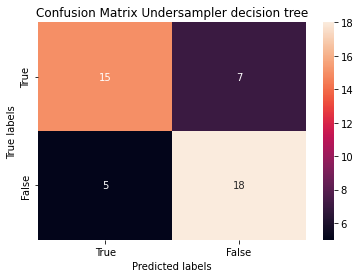

In [37]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Undersampler decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

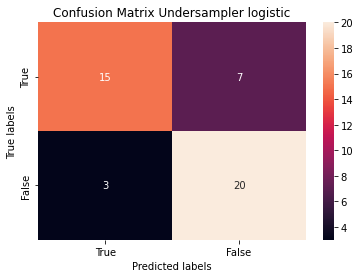

In [38]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Undersampler logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

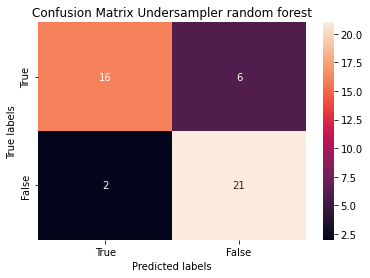

In [39]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Undersampler random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

In [40]:
target_names = ['True','False']
print("Report Undersampler model decision tree\n")
print(classification_report(decisiontree_classifier_pred, y_test, target_names=target_names))

Report Undersampler model decision tree

              precision    recall  f1-score   support

        True       0.68      0.75      0.71        20
       False       0.78      0.72      0.75        25

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.74      0.73      0.73        45



In [41]:
target_names = ['True','False']
print("Report Undersampler model logistic\n")
print(classification_report(logistic_pred, y_test, target_names=target_names))

Report Undersampler model logistic

              precision    recall  f1-score   support

        True       0.68      0.83      0.75        18
       False       0.87      0.74      0.80        27

    accuracy                           0.78        45
   macro avg       0.78      0.79      0.77        45
weighted avg       0.79      0.78      0.78        45



In [42]:
target_names = ['True','False']
print("Report Undersampler model random forest\n")
print(classification_report(fr_pred, y_test, target_names=target_names))

Report Undersampler model random forest

              precision    recall  f1-score   support

        True       0.73      0.89      0.80        18
       False       0.91      0.78      0.84        27

    accuracy                           0.82        45
   macro avg       0.82      0.83      0.82        45
weighted avg       0.84      0.82      0.82        45



### SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X,y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.15, random_state = 6)

In [45]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [46]:
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

fr = RandomForestClassifier(max_depth=9, n_estimators=1000)
fr.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [47]:
print("Accuracy score of decisiontree model is: ", decisiontree_classifier.score(X_test, y_test))
print("Accuracy score of logistic model is: ", logistic.score(X_test, y_test))
print("Accuracy score of random forest model is: ", fr.score(X_test, y_test))

Accuracy score of decisiontree model is:  0.8373983739837398
Accuracy score of logistic model is:  0.8333333333333334
Accuracy score of random forest model is:  0.9308943089430894


In [48]:
decisiontree_classifier_pred = decisiontree_classifier.predict(X_test)
cm_tree = confusion_matrix(y_test, decisiontree_classifier_pred)

logistic_pred = logistic.predict(X_test)
cm_logistic = confusion_matrix(y_test, logistic_pred)

fr_pred = fr.predict(X_test)
cm_fr = confusion_matrix(y_test, fr_pred)

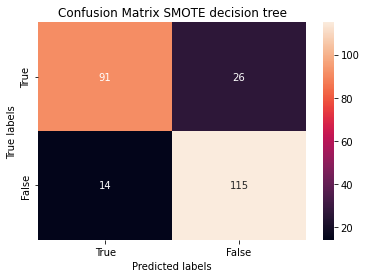

In [49]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SMOTE decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

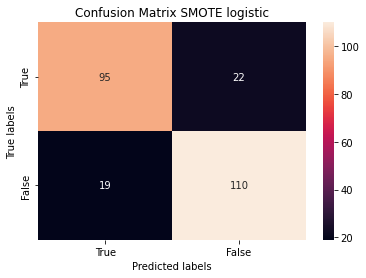

In [50]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SMOTE logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

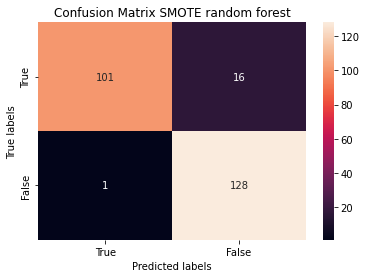

In [51]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SMOTE random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

In [52]:
target_names = ['True','False']
print("Report SMOTE model decision tree\n")
print(classification_report(decisiontree_classifier_pred, y_test, target_names=target_names))

Report SMOTE model decision tree

              precision    recall  f1-score   support

        True       0.78      0.87      0.82       105
       False       0.89      0.82      0.85       141

    accuracy                           0.84       246
   macro avg       0.83      0.84      0.84       246
weighted avg       0.84      0.84      0.84       246



In [53]:
target_names = ['True','False']
print("Report SMOTE model logistic\n")
print(classification_report(logistic_pred, y_test, target_names=target_names))

Report SMOTE model logistic

              precision    recall  f1-score   support

        True       0.81      0.83      0.82       114
       False       0.85      0.83      0.84       132

    accuracy                           0.83       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246



In [54]:
target_names = ['True','False']
print("Report SMOTE model random forest\n")
print(classification_report(fr_pred, y_test, target_names=target_names))

Report SMOTE model random forest

              precision    recall  f1-score   support

        True       0.86      0.99      0.92       102
       False       0.99      0.89      0.94       144

    accuracy                           0.93       246
   macro avg       0.93      0.94      0.93       246
weighted avg       0.94      0.93      0.93       246



# Kfold

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kf = KFold(n_splits=5, shuffle=True, random_state=6)

In [63]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [64]:
score = cross_val_score(DecisionTreeClassifier(), X, y, cv= kf)
print(f'Decision tree, Scores for each fold: {score}')
print("Mean score:", score.mean())

Decision tree, Scores for each fold: [0.82474227 0.84455959 0.80829016 0.76683938 0.83937824]
Mean score: 0.8167619251108382


In [65]:
score = cross_val_score(LogisticRegression(), X, y, cv= kf)
print(f'Logistic, Scores for each fold: {score}')
print("Mean score:", score.mean())

Logistic, Scores for each fold: [0.81958763 0.87564767 0.83937824 0.82901554 0.86010363]
Mean score: 0.8447465413172374


In [66]:
score = cross_val_score(RandomForestClassifier(), X, y, cv= kf)
print(f'Random forest, Scores for each fold: {score}')
print("Mean score:", score.mean())

Random forest, Scores for each fold: [0.85051546 0.89637306 0.86010363 0.85492228 0.86528497]
Mean score: 0.8654398803482719


In [67]:
decisiontree_classifier_fold_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=kf)
logistic_pred_fold_pred = cross_val_predict(LogisticRegression(), X, y, cv=kf)
fr_fold_pred = cross_val_predict(RandomForestClassifier(), X, y, cv=kf)

In [68]:
cm_tree = confusion_matrix(y, decisiontree_classifier_fold_pred)
cm_logistic = confusion_matrix(y, logistic_pred_fold_pred)
cm_fr = confusion_matrix(y, fr_fold_pred)

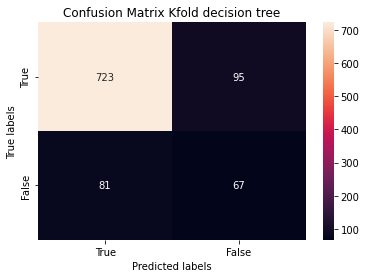

In [69]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

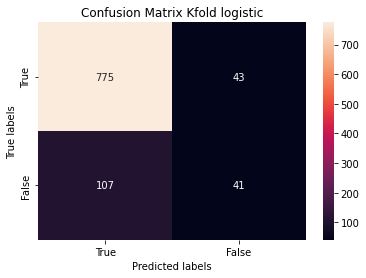

In [70]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

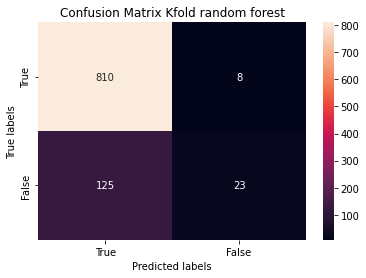

In [71]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

In [72]:
target_names = ['True','False']
print("Report Kfold model decision tree\n")
print(classification_report(decisiontree_classifier_fold_pred, y, target_names=target_names))

Report Kfold model decision tree

              precision    recall  f1-score   support

        True       0.88      0.90      0.89       804
       False       0.45      0.41      0.43       162

    accuracy                           0.82       966
   macro avg       0.67      0.66      0.66       966
weighted avg       0.81      0.82      0.81       966



In [73]:
target_names = ['True','False']
print("Report Kfold model logistic\n")
print(classification_report(logistic_pred_fold_pred, y, target_names=target_names))

Report Kfold model logistic

              precision    recall  f1-score   support

        True       0.95      0.88      0.91       882
       False       0.28      0.49      0.35        84

    accuracy                           0.84       966
   macro avg       0.61      0.68      0.63       966
weighted avg       0.89      0.84      0.86       966



In [74]:
target_names = ['True','False']
print("Report Kfold model random forest\n")
print(classification_report(fr_fold_pred, y, target_names=target_names))

Report Kfold model random forest

              precision    recall  f1-score   support

        True       0.99      0.87      0.92       935
       False       0.16      0.74      0.26        31

    accuracy                           0.86       966
   macro avg       0.57      0.80      0.59       966
weighted avg       0.96      0.86      0.90       966



## Kfold Random undersampler

In [75]:
from imblearn.under_sampling import RandomUnderSampler

rs=RandomUnderSampler(sampling_strategy=1.0) #Sampling Startegy means the ratio
X_new, y_new = rs.fit_resample(X,y)

In [76]:
scale = StandardScaler()
X_new = scale.fit_transform(X_new)

In [77]:
score = cross_val_score(DecisionTreeClassifier(), X_new, y_new, cv= kf)
print(f'Decision tree, Scores for each fold: {score}')
print("Mean score:", score.mean())

Decision tree, Scores for each fold: [0.68333333 0.6440678  0.59322034 0.69491525 0.69491525]
Mean score: 0.662090395480226


In [78]:
score = cross_val_score(LogisticRegression(), X_new, y_new, cv= kf)
print(f'Logistic, Scores for each fold: {score}')
print("Mean score:", score.mean())

Logistic, Scores for each fold: [0.83333333 0.72881356 0.61016949 0.77966102 0.72881356]
Mean score: 0.7361581920903955


In [79]:
score = cross_val_score(RandomForestClassifier(), X_new, y_new, cv= kf)
print(f'Random forest, Scores for each fold: {score}')
print("Mean score:", score.mean())

Random forest, Scores for each fold: [0.81666667 0.74576271 0.55932203 0.79661017 0.77966102]
Mean score: 0.7396045197740113


In [80]:
from sklearn.model_selection import cross_val_predict
decisiontree_classifier_fold_pred = cross_val_predict(DecisionTreeClassifier(), X_new, y_new, cv=kf)
logistic_pred_fold_pred = cross_val_predict(LogisticRegression(), X_new, y_new, cv=kf)
fr_fold_pred = cross_val_predict(RandomForestClassifier(), X_new, y_new, cv=kf)

In [81]:
cm_tree = confusion_matrix(y_new, decisiontree_classifier_fold_pred)
cm_logistic = confusion_matrix(y_new, logistic_pred_fold_pred)
cm_fr = confusion_matrix(y_new, fr_fold_pred)

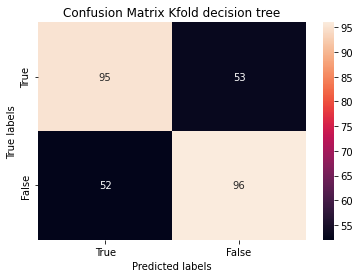

In [82]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

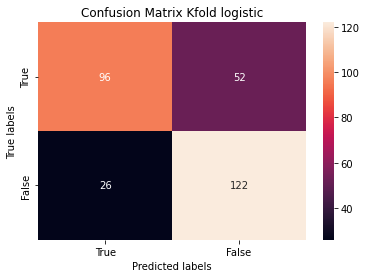

In [83]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

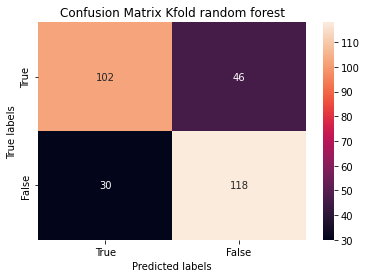

In [84]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

In [86]:
target_names = ['True','False']
print("Report Kfold model decision tree\n")
print(classification_report(decisiontree_classifier_fold_pred, y_new, target_names=target_names))

Report Kfold model decision tree

              precision    recall  f1-score   support

        True       0.64      0.65      0.64       147
       False       0.65      0.64      0.65       149

    accuracy                           0.65       296
   macro avg       0.65      0.65      0.65       296
weighted avg       0.65      0.65      0.65       296



In [87]:
target_names = ['True','False']
print("Report Kfold model logistic\n")
print(classification_report(logistic_pred_fold_pred, y_new, target_names=target_names))

Report Kfold model logistic

              precision    recall  f1-score   support

        True       0.65      0.79      0.71       122
       False       0.82      0.70      0.76       174

    accuracy                           0.74       296
   macro avg       0.74      0.74      0.73       296
weighted avg       0.75      0.74      0.74       296



In [88]:
target_names = ['True','False']
print("Report Kfold model random forest\n")
print(classification_report(fr_fold_pred, y_new, target_names=target_names))




Report Kfold model random forest

              precision    recall  f1-score   support

        True       0.69      0.77      0.73       132
       False       0.80      0.72      0.76       164

    accuracy                           0.74       296
   macro avg       0.74      0.75      0.74       296
weighted avg       0.75      0.74      0.74       296



## Kfold Random SMOTE

In [89]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X,y)

In [90]:
scale = StandardScaler()
X_new = scale.fit_transform(X_new)

In [91]:
score = cross_val_score(DecisionTreeClassifier(), X_new, y_new, cv= kf)
print(f'Decision tree, Scores for each fold: {score}')
print("Mean score:", score.mean())

Decision tree, Scores for each fold: [0.875      0.85932722 0.88685015 0.85932722 0.89296636]
Mean score: 0.8746941896024465


In [92]:
score = cross_val_score(LogisticRegression(), X_new, y_new, cv= kf)
print(f'Logistic, Scores for each fold: {score}')
print("Mean score:", score.mean())

Logistic, Scores for each fold: [0.82926829 0.81651376 0.85932722 0.84097859 0.82874618]
Mean score: 0.8349668083836802


In [93]:
score = cross_val_score(RandomForestClassifier(), X_new, y_new, cv= kf)
print(f'Random forest, Scores for each fold: {score}')
print("Mean score:", score.mean())

Random forest, Scores for each fold: [0.92378049 0.9204893  0.94801223 0.95107034 0.9204893 ]
Mean score: 0.9327683299768778


In [94]:
from sklearn.model_selection import cross_val_predict
decisiontree_classifier_fold_pred = cross_val_predict(DecisionTreeClassifier(), X_new, y_new, cv=kf)
logistic_pred_fold_pred = cross_val_predict(LogisticRegression(), X_new, y_new, cv=kf)
fr_fold_pred = cross_val_predict(RandomForestClassifier(), X_new, y_new, cv=kf)

In [95]:
cm_tree = confusion_matrix(y_new, decisiontree_classifier_fold_pred)
cm_logistic = confusion_matrix(y_new, logistic_pred_fold_pred)
cm_fr = confusion_matrix(y_new, fr_fold_pred)

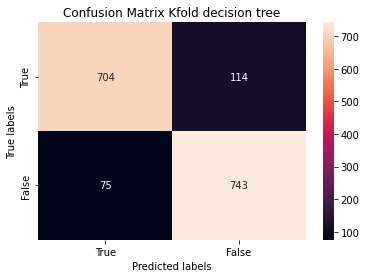

In [96]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

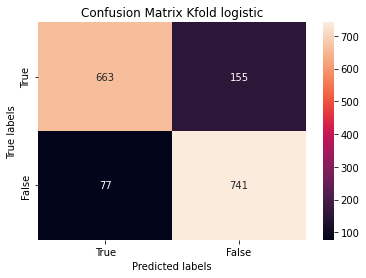

In [24]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

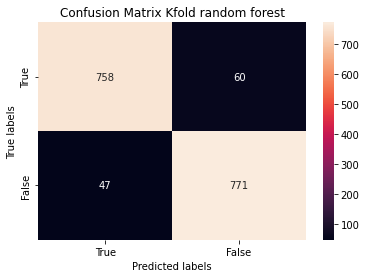

In [25]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Kfold random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

In [26]:
target_names = ['True','False']
print("Report Kfold model decision tree\n")
print(classification_report(decisiontree_classifier_fold_pred, y_new, target_names=target_names))

Report Kfold model decision tree

              precision    recall  f1-score   support

        True       0.85      0.86      0.85       809
       False       0.86      0.85      0.86       827

    accuracy                           0.86      1636
   macro avg       0.86      0.86      0.86      1636
weighted avg       0.86      0.86      0.86      1636



In [27]:
target_names = ['True','False']
print("Report Kfold model logistic\n")
print(classification_report(logistic_pred_fold_pred, y_new, target_names=target_names))

Report Kfold model logistic

              precision    recall  f1-score   support

        True       0.81      0.90      0.85       740
       False       0.91      0.83      0.86       896

    accuracy                           0.86      1636
   macro avg       0.86      0.86      0.86      1636
weighted avg       0.86      0.86      0.86      1636



In [28]:
target_names = ['True','False']
print("Report Kfold model random forest\n")
print(classification_report(fr_fold_pred, y_new, target_names=target_names))

Report Kfold model random forest

              precision    recall  f1-score   support

        True       0.93      0.94      0.93       805
       False       0.94      0.93      0.94       831

    accuracy                           0.93      1636
   macro avg       0.93      0.93      0.93      1636
weighted avg       0.93      0.93      0.93      1636

